In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

8342982531.8334875


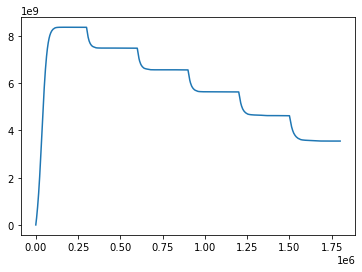

In [42]:
ice=pd.read_csv("ice_dimensions_d_3.csv")
mass=pd.read_csv("ice_m_d_3.csv")

plt.plot(mass['0'])
print(mass['0'][113171])

#plt.plot([300000,600000],[eq_levels[1],eq_levels[1]])
#plt.xlim([290000,610000])
#plt.ylim([4E9,5E9])

In [3]:
def min_max_scaling(data):
    data_2= (data - np.min(data)) / (np.max(data) - np.min(data))
        
    return data_2

def closest(list, Number):
    aux = []
    for valor in list:
        aux.append(abs(Number-valor))

    return aux.index(min(aux))

In [44]:
def resp_time(data,num,diff,ts,mode):
    eq_levels=[]
    loc_eq_levels=[]
    rt=np.arange(0,num-1)
    times=np.arange(0,diff*num*ts+1)
    sections=np.zeros((num,len(times)))
    ice_h=list(data['0'])
    e_fold=1-1/np.exp(1)
    changes=np.arange(0,diff*num*ts+1,diff*ts)
    steps=changes[1:]-1
    changes2=np.arange(0,diff*num*ts+1,diff*ts)
    changes2[0]=30000

    
    if mode=="up":
        for i in range(num):
            eq_levels=np.append(eq_levels,data['0'][steps[i]])
            loc_eq_levels=np.append(loc_eq_levels,ice_h.index(eq_levels[i]))
            
        for j in range(num):
            mass_diff=eq_levels[j]-eq_levels[j-1]
            e_fold_m=e_fold*mass_diff+eq_levels[j-1]
            rt[j]=times[closest(ice_h,e_fold_m)]-changes[j]
        print(rt/ts)
        
    elif mode == "down":
        jump=200000
        ice_h_d=ice_h[jump:]
        for i in range(num):
            eq_levels=np.append(eq_levels,data['0'][steps[i]])
        for j in range(num-1):
            mass_diff=eq_levels[j]-eq_levels[j+1]
            e_fold_m=eq_levels[j]-e_fold*mass_diff
            rt[j]=times[closest(ice_h_d,e_fold_m)]+jump-changes[j+1] 
        print(rt/ts)
    return eq_levels,rt/ts,times

In [43]:
eq_levels,rt=resp_time(mass,6,1000,300,'down')

[8.37324761e+09 7.49068936e+09 6.56995150e+09 5.63834932e+09
 4.62936183e+09 3.55205836e+09]
[      0  300000  600000  900000 1200000 1500000 1800000]
882558241.9099874
7815364397.465374
114329
314329
-185671
[47.76333333 51.51       54.59       62.08333333 72.61333333]


In [4]:
def resp_time0(data,num,diff,ts):
    eq_levels=[]
    loc_eq_levels=[]
    rt=np.arange(0,num)
    times=np.arange(0,diff*num*ts+1)
    sections=np.zeros((num,len(times)))
    ice_h=list(data['0'])
    e_fold=1-1/np.exp(1)
    changes=np.arange(0,diff*num*ts+1,diff*ts)
    steps=changes[1:]-1
    print(changes)
    print(steps)
    
    for i in range(num):
        eq_levels=np.append(eq_levels,data['0'][steps[i]])
        loc_eq_levels=np.append(loc_eq_levels,ice_h.index(eq_levels[i]))
    print(eq_levels)
    print(loc_eq_levels)    
    for j in range(num):
        mass_diff=eq_levels[j]-eq_levels[j-1]
        e_fold_m=e_fold*mass_diff+eq_levels[j-1]
        rt[j]=times[closest(ice_h,e_fold_m)]-changes[j]
    print(rt/ts)
    return eq_levels,rt/ts

In [7]:
def resp_time1(num,diff,ts,mode):
    eq_levels=[]
    loc_eq_levels=[]
    rt=np.arange(0,num)
    times=np.arange(0,300000)
    sections=np.zeros((num,len(times)))
    ice_h=list(ice['0'][50000:])
    e_fold=1/np.exp(1)
    changes=np.arange(0,diff*num*ts+1,diff*ts)
    steps=changes[1:]-1
    print(changes)
    if mode=="up":
        for i in range(num):
            eq_levels=np.append(eq_levels,ice['0'][steps[i]])
            loc_eq_levels=np.append(loc_eq_levels,ice_h.index(eq_levels[i])+50000)
            print(eq_levels)
        for j in range(num):
            section=[]
            section=ice['0'][int(changes[j]):int(loc_eq_levels[j])]
            print(np.shape(section))
            section=np.append(section,np.zeros((len(times)-np.shape(section)[0])))
            section_n=min_max_scaling(section)
            sections[j,:]=section_n
            rt[j]=times[closest(section_n,e_fold)]
    if mode=="down":
        for i in range(num):
            eq_levels=np.append(eq_levels,ice['0'][steps[i]])
            loc_eq_levels=np.append(loc_eq_levels,ice_h.index(eq_levels[i])+50000)
            print(eq_levels)
        for j in range(num):
            section=[]
            section=ice['0'][int(changes[j]):int(loc_eq_levels[j+1])]
            print(np.shape(section))
            section=np.append(section,np.zeros((len(times)-np.shape(section)[0])))
            section_n=min_max_scaling(section)
            sections[j,:]=section_n
        
    
    return sections,rt/200.